# 앞서 구현한 KNN모델의 문제?
- 문제와 답을 알려주고 동일한 문제로 시험을 본다는 것은 무엇을 의미하는가?
- 도미 35마리와 빙어 14마리를 모두 저장해두고 이를 맞추는 것은 당연한 것 아닌가?
- 훈련 데이터가 아닌 데이터로 테스트를 해야 제대로된 정확도라고 볼 수 있음


## 지도 학습과 비지도 학습
### 지도(supervised) 학습
- 훈련 데이터와 정답을 주고 학습을 시키는 것
- 훈련데이터는 입력(Input), 정답 데이터는 타겟(Target). 합쳐서 훈련(train) 데이터
- 일반적으로 7:3, 8:2 등으로 분할함(훈련데이터를 큰 비율로)
- 보통 회귀와 분류에 적용되는 방식

### 비지도(unsupervised) 학습
- 훈련 데이터만 주고 학습을 시키는 것
- 데이터로부터 어떤 특징을 도출하기 위한 목적으로 사용

#### 데이터 준비

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [4]:
# 2차원 데이터로 변환(각각의 데이터는 샘플이라 부름)
fish_data = [[l, w] for l,w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

In [5]:
# KNN모델 임포트
from sklearn.neighbors import KNeighborsClassifier

# KNN 인스턴스 생성
kn = KNeighborsClassifier()

In [6]:
# 리스트 슬라이싱으로 훈련데이터로 35개, 테스트 데이터로 나머지 14개 선택
train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

In [7]:
kn.fit(train_input, train_target) # 35개의 훈련데이터로 학습
kn.score(test_input, test_target) # 14개의 테스트 데이터로 정확도 평가

0.0

#### 왜 정확도가 0인가?

### 샘플링 편향
- 데이터셋에 35개까지 도미데이터이고 그 다음 14개의 데이터가 빙어이다.
- 모델은 도미만으로 학습이 되었고 테스트 데이터는 빙어만 존재함

- 학습 데이터와 테스트 데이터는 도미와 빙어 비율이 비슷해야 한다.
- numpy를 활용하여 이를 해결

In [8]:
# 넘파이 모듈 import하기
import numpy as np

In [9]:
# 생선 데이터로 numpy 배열 생성(input, target)
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [10]:
input_arr

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [11]:
# input데이터의 형태 확인
input_arr.shape

(49, 2)

In [12]:
# target데이터의 형태 확인
target_arr.shape

(49,)

In [14]:
# 데이터를 섞기 위해 넘파이의 랜덤기능 활용
index = np.arange(49)
index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

In [18]:
# 넘파이 배열을 랜덤하게 섞기
np.random.seed(41)
np.random.shuffle(index)

In [19]:
index

array([ 0, 33,  7, 37,  6, 27, 15, 31,  9, 11, 44, 14,  4,  3, 45, 16, 12,
        1, 36, 24, 38, 32, 25, 26,  8, 21, 43, 34, 23, 47, 28,  5,  2, 41,
       42, 13, 10, 35, 29, 17, 19, 39, 40, 30, 46, 22, 18, 20, 48])

In [20]:
# 넘파이의 배열 인덱싱으로 훈련데이터와 테스트 데이터 나누기
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

In [21]:
# 형태 확인
print('train: ', train_input.shape, train_target.shape)
print('test: ', test_input.shape, test_target.shape)

train:  (35, 2) (35,)
test:  (14, 2) (14,)


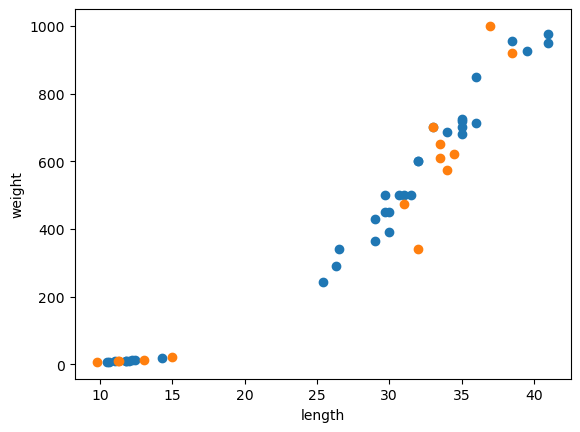

In [25]:
# 시각화
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1]) #학습 데이터 셋의 생선 길이, 생선 무게  
plt.scatter(test_input[:,0], test_input[:,1]) #테스트 데이터 셋의 생선 길이, 생선 무게
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 머신러닝 모델 만들기

In [26]:
# KNeighborsClassifier 임포트하기
from sklearn.neighbors import KNeighborsClassifier

# KNeighborsClassifier 객체 생성
kn = KNeighborsClassifier()

# 학습하기
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [27]:
# 모델 정확도 평가 점수 확인
kn.score(test_input, test_target)

1.0

In [31]:
# 테스트 데이터로 예측해보기
y_hat = kn.predict(test_input)
y_hat

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0])

In [32]:
# 테스트 데이터의 정답
test_target

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0])

In [33]:
# 테스트 데이터의 정답과 비교
y_hat == test_target

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

## 여기까지 정리 및 이해